# Exploratory Data Analysis of the NYC Food Order and Delivery 

## Importing the data

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Import the dataset
path = "Dataset/food_order.csv"
data_df = pd.read_csv(path)
data_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
# Underdstand the structure of the data
print('There are', data_df.shape[0], 'Rows and', data_df.shape[1], 'Columns in the given dataset')
print("\n")
data_df.info()

There are 1898 Rows and 9 Columns in the given dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


 We can make the following obseravtions about the dataset:
* Since each column have the same number of entries, there are no null values in the dataset
* 4 columns are int64, 4 columns are object and 1 column is float64


## Data Cleaning/Wrangling

### First we check for missing values on each column

In [5]:
# Check to see if a column has any null values
data_df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

There are no null values in the dataset

### Then we check if there are duplicates

In [6]:
# check to see if there are any dupplicated rows
data_df[data_df.duplicated(keep = False)]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


there are no duplicated rows

### Afterwards we check the values for each column

In [7]:
data_df["restaurant_name"].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

There seems to be some mistakes in restaurant names that needs to be fixed

In [8]:
data_df = data_df.replace({"Big Wong Restaurant \x8c_¤¾Ñ¼":"Big Wong Restaurant",
                           'Empanada Mama (closed)':'Empanada Mama','Chipotle Mexican Grill $1.99 Delivery':'Chipotle Mexican Grill',
                           "Joe's Shanghai \x8e_À\x8eü£¾÷´":"Joe's Shanghai", 'Dirty Bird To Go (archived)':'Dirty Bird To Go' ,
                           'CafÌ© China':'Cafe China'})

In [9]:
np.sort(data_df["restaurant_name"].unique())

array(["'wichcraft", '12 Chairs', '5 Napkin Burger', '67 Burger',
       'Alidoro', 'Amma', "Amy Ruth's", 'Anjappar Chettinad',
       'Asuka Sushi', 'Aurora', 'Balade', 'Balthazar Boulangerie',
       'Barbounia', 'Bareburger', 'Benihana', 'Bhatti Indian Grill',
       "Big Daddy's", 'Big Wong Restaurant', 'Bistango',
       'Blue Ribbon Brooklyn', 'Blue Ribbon Fried Chicken',
       'Blue Ribbon Sushi', 'Blue Ribbon Sushi Bar & Grill',
       'Blue Ribbon Sushi Izakaya', 'Boqueria', "Bubby's ",
       'Bukhara Grill', 'Burger Joint', 'Byblos Restaurant', 'Cafe China',
       'Cafe Habana', 'Cafe Mogador', 'Cafe de La Esquina', 'Cafeteria',
       "Carmine's", 'Chipotle Mexican Grill', 'Cho Dang Gol',
       'Chola Eclectic Indian Cuisine', 'Chote Nawab',
       'Cipriani Le Specialita', "Coppola's East", 'Crema Restaurante',
       'Delicatessen', 'DespaÌ±a', "Dickson's Farmstand Meats",
       'Dig Inn Seasonal Market', 'Dirty Bird To Go', 'Dirty Bird to Go',
       "Don's Bogam BBQ

Values for restaurant names are now fixed

In [10]:
data_df["cuisine_type"].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

Values for cuisine type appear to be in order

In [11]:
data_df["day_of_the_week"].unique()

array(['Weekend', 'Weekday'], dtype=object)

Values for day of the week appear to be in order

In [12]:
data_df["rating"].unique()

array(['Not given', '5', '3', '4'], dtype=object)

There seems to be a 'Not given' value that represents ratings not givem or null values. Lets check how many of them are there

In [13]:
data_df["rating"].value_counts(normalize=True)*100

Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: rating, dtype: float64

It appears that there are approximately 39% of orders where ratings are 'Not given' we can drop the rows with 'Not given' and only keep the rows that have ratings

In [14]:
data_df = data_df.query("rating != 'Not given'")
data_df = data_df.astype({"rating": int})
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


To simplify calculations and analysis, food preparation time and delivery time will be added together to create a new column that has the total time it took to complete the order (order completition time)

In [15]:
data_df["order_completion_time"] = data_df["food_preparation_time"] + data_df["delivery_time"]
data_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,order_completion_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,44
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63


We will not check int and float type columns, because we already know that there are no missing values and that the values are already in a specific numeric type

In [16]:
cleaned_df = data_df.copy()

## Analysis of Distribution of Data
### We will explore each column individually, providing statistics and observations on their distributions

#### Analyzing order_id

In [17]:
cleaned_df["order_id"].nunique()

1162

* As expected, there are 1162 number of orders after cleaning the dataset
* Approximately 734 orders were removed when cleaning the data 

#### Analyzing customer_id

In [18]:
cleaned_df["customer_id"].nunique()

859

In [19]:
a_customer_id = cleaned_df["customer_id"].value_counts()
a_customer_id.head(10)


47440     7
52832     7
65009     6
250494    6
276192    5
60052     5
259341    5
47280     5
64153     4
78939     4
Name: customer_id, dtype: int64

* There are 859 unique customers in the dataset out of 1162 orders
* The most amount of orders a customer has is 7

#### Analyzing restaurant_name

In [20]:
cleaned_df["restaurant_name"].nunique()

156

In [21]:
a_res_name = pd.concat([cleaned_df["restaurant_name"].value_counts().rename("number_of_orders"), 
               cleaned_df["restaurant_name"].value_counts(normalize=True).rename("percentage")*100],
              axis =1)
a_res_name.head(10)

,number_of_orders,percentage
Shake Shack,133,11.445783
The Meatball Shop,84,7.228916
Blue Ribbon Sushi,73,6.282272
Blue Ribbon Fried Chicken,64,5.507745
RedFarm Broadway,41,3.528399
Parm,39,3.356282
RedFarm Hudson,34,2.925990
TAO,28,2.409639
Rubirosa,24,2.065404
Nobu Next Door,23,1.979346


Since there are 156 unique restaurants, let's only plot the top 10 restaurants with highest number of orders

Text(0.5, 1.0, 'Top 10 Restaurants')

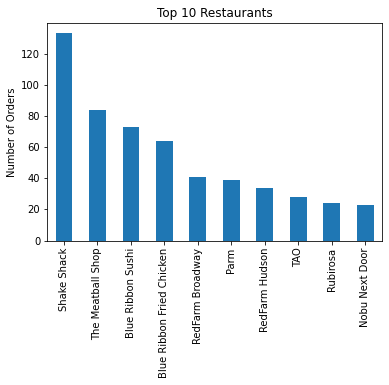

In [22]:
res_name_graph = a_res_name.head(10)
res_name_graph.plot(kind = "bar", y = "number_of_orders", legend =None)
plt.ylabel("Number of Orders")
plt.title("Top 10 Restaurants")

In [23]:
res_name_graph["percentage"].sum()

46.72977624784854

* There are 156 unique restaurants in the dataset
* Shake Shack has the highest number of orders (133) and covers about 11.5% of the dataset
* The Meatball Shop comes at 2nd highest number of orders (84) and covering 72% of the dataset
* The Blue Ribbon Sushi comes at 3rd highest number of orders (73) and covering 6.3% of the dataset
* The top 10 restaurants cover about 47% of the total number of orders in the whole dataset implying that the distribution of our data is skewed


#### Analyzing cuisine_type

In [24]:
a_cuisine = pd.concat([cleaned_df["cuisine_type"].value_counts().rename("number_of_orders"), 
               cleaned_df["cuisine_type"].value_counts(normalize=True).rename("percentage")*100],
              axis =1)
a_cuisine

,number_of_orders,percentage
American,368,31.669535
Japanese,273,23.493976
Italian,172,14.802065
Chinese,133,11.445783
Indian,50,4.302926
Mexican,48,4.130809
Middle Eastern,34,2.925990
Mediterranean,32,2.753873
Southern,13,1.118761
French,10,0.860585


Text(0.5, 1.0, 'Cuisine Types')

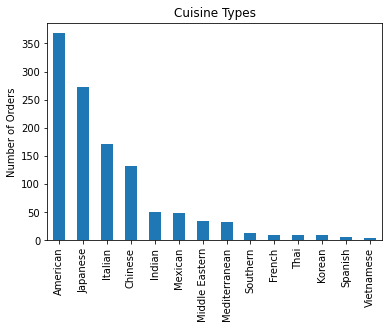

In [25]:
a_cuisine.plot(kind = "bar", y = "number_of_orders", legend =None)
plt.ylabel("Number of Orders")
plt.title("Cuisine Types")

In [26]:
a_cuisine.iloc[:4, :].sum()

number_of_orders    946.00000
percentage           81.41136
dtype: float64

* The top 3 cuisines with the highest number if orders are:
  * American (30.7%) is the most ordered
  * Japenese (24.7%) is the 2nd most ordered 
  * Italian (15.7%) is the 3rd most ordered 
* The least orderd cuisine is Vietnamese (0.3%)
* The top 4 cuisine types of our data hold approximately 81% of the total number of orders implying that the distribution of our data is skewed

#### Analyzing cost_of_the_order

Text(0.5, 1.0, 'Distribution of Cost of the Orders')

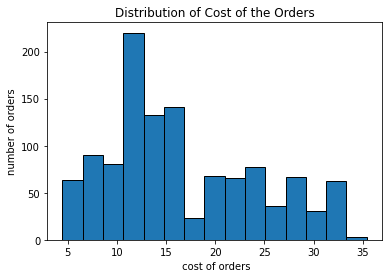

In [27]:
cleaned_df["cost_of_the_order"].hist(bins = 15, edgecolor = "black", grid = False)
plt.xlabel(" cost of orders")
plt.ylabel("number of orders")
plt.title("Distribution of Cost of the Orders")

Text(0.5, 1.0, 'Boxplot of Cost of Order')

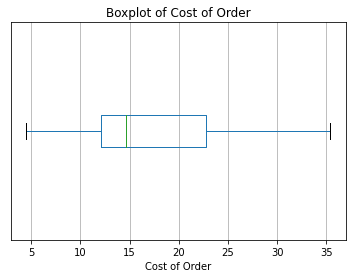

In [28]:
cleaned_df.boxplot(column = ["cost_of_the_order"], vert=False)
plt.xlabel("Cost of Order")
plt.yticks([])
plt.title("Boxplot of Cost of Order")

In [29]:
cleaned_df["cost_of_the_order"].describe()

count    1162.000000
mean       16.760766
std         7.572578
min         4.470000
25%        12.130000
50%        14.600000
75%        22.750000
max        35.410000
Name: cost_of_the_order, dtype: float64

* The data appears to be consistent, meaning no anomalies or outliers
* The histogram and boxplot indicate skewness towards right.
* The median order cost is approximately 14 dollars, while the mean is at 16.80 dollars.
* The minimum order cost is approximately 4.50 dollars
* The maximum order cost is approximately 35.40  dollars
* Since the cost is skewed to the right, it is visible that majority of the customers are conservative and make orders less than or equal to $20


#### Analyzing day_of_the_week

In [30]:
a_week = pd.concat([cleaned_df["day_of_the_week"].value_counts().rename("number_of_orders"), 
               cleaned_df["day_of_the_week"].value_counts(normalize=True).rename("percentage")*100],
              axis =1)
a_week

,number_of_orders,percentage
Weekend,822,70.740103
Weekday,340,29.259897


* There are almost 71% orders on weekend and almost 29% orders on weekdays
* We can observe that either the majority of customers choose to order food on the weekends or the dataset we obtained is biased

### Analyzing rating

Text(0.5, 1.0, 'Distribution of Rating')

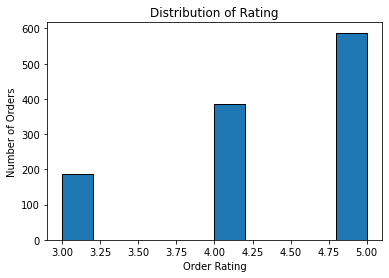

In [31]:
cleaned_df["rating"].hist(bins = 10, edgecolor = "black", grid = False)
plt.xlabel("Order Rating")
plt.ylabel("Number of Orders")
plt.title("Distribution of Rating")

Text(0.5, 1.0, 'Boxplot of Order Rating')

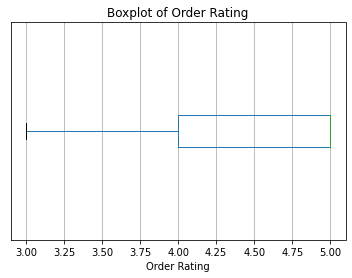

In [32]:
cleaned_df.boxplot(column = ["rating"], vert=False)
plt.xlabel("Order Rating")
plt.yticks([])
plt.title("Boxplot of Order Rating")

In [33]:
cleaned_df["rating"].describe()

count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

* Since the data was converted into numeric from categorical, we can see that the distribution is not continuous
* The data appears to be consistent, meaning no anomalies or outliers.
* 75% of the order ratings are between 4 and 5, with mean = 4.35
* The minimum rating is 3
* The maximum rating is 5


### Analyzing order_completion_time

Text(0.5, 1.0, 'Distribution of Order Completion Time')

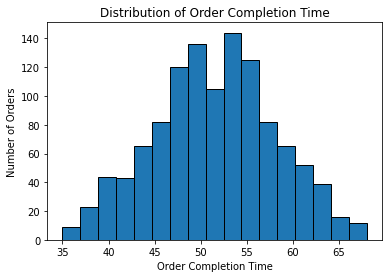

In [34]:
cleaned_df["order_completion_time"].hist(bins = 17, edgecolor = "black", grid = False)
plt.xlabel("Order Completion Time")
plt.ylabel("Number of Orders")
plt.title("Distribution of Order Completion Time")

Text(0.5, 1.0, 'Boxplot of Order Completion Time')

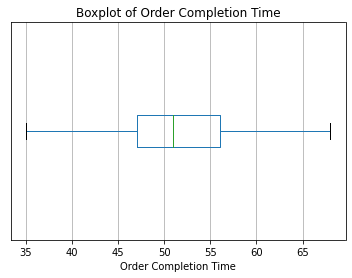

In [35]:
cleaned_df.boxplot(column = ["order_completion_time"], vert=False)
plt.xlabel("Order Completion Time")
plt.yticks([])
plt.title("Boxplot of Order Completion Time")

In [36]:
cleaned_df["order_completion_time"].describe()

count    1162.000000
mean       51.535284
std         6.767522
min        35.000000
25%        47.000000
50%        51.000000
75%        56.000000
max        68.000000
Name: order_completion_time, dtype: float64

* The data appears to be consistent, meaning no anomalies.
* The histogram and boxplot indicate a normal distribution
* The median order completion time is approximately 52 minutes , while the mean is at 51.53 minutes.
* The minimum order cost is approximately 35 minutes
* The maximum order completion time is approximately 68 minutes
* The distribution of our data implies that most orders a completed within 47 to 55 minutes

## Research Questions

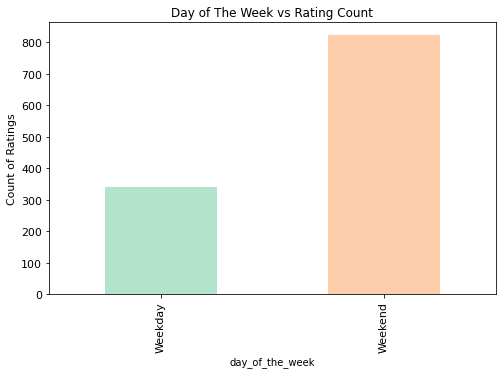

In [37]:
weekly_ratings = cleaned_df.groupby("day_of_the_week")
week_df = weekly_ratings["rating"].count()
N=2
week_df.plot(kind="bar", color = plt.cm.Pastel2(np.arange(N)),figsize=(8,5),fontsize = 11)
plt.ylabel("Count of Ratings",fontsize = 11)
plt.title("Day of The Week vs Rating Count")
plt.show()


* It seems that weekends are very important and prime business days
* Since there seems to be more order on the weekends rather than the weekdays lets slipt the research questions by days of the week to see if we can find any interesting insights

In [38]:
df_weekday = cleaned_df.query("day_of_the_week == 'Weekday'")
df_weekend = cleaned_df.query("day_of_the_week == 'Weekend'")

### Restaurant vs Rating 

In [39]:
# we will only take into account the top 10 restaurants with the most number of orders and highest rating
restaurant_v_rating_df = df_weekday[["restaurant_name","rating", "cost_of_the_order", "order_completion_time"]].groupby(by = ["restaurant_name"]).agg({"rating":['count','mean']})
top_10_df_day = restaurant_v_rating_df.sort_values(by =("rating", "count"), ascending = False).head(10)
top_10_df_day = top_10_df_day.sort_values(by =("rating", "mean"), ascending = False)
top_10_df_day

rating          
                               count      mean
restaurant_name                               
Blue Ribbon Sushi Bar & Grill      8  4.875000
The Meatball Shop                 30  4.666667
Parm                              13  4.538462
Blue Ribbon Fried Chicken         15  4.466667
ilili Restaurant                   8  4.250000
Nobu Next Door                     8  4.250000
Shake Shack                       47  4.234043
Blue Ribbon Sushi                 15  4.133333
RedFarm Broadway                   8  4.000000
Momoya                             8  4.000000

Text(0.5, 1.0, 'Restaurant vs Rating (Weekday)')

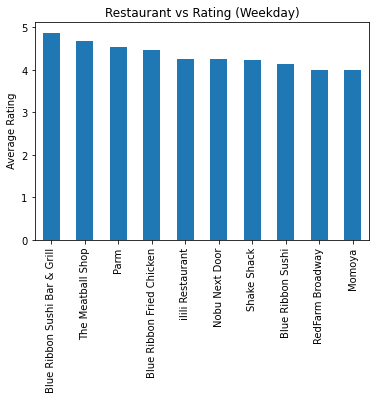

In [40]:
top_10_df_day.plot(kind = "bar", y = ("rating", "mean"), legend = None)
plt.xlabel('')
plt.ylabel(" Average Rating")
plt.title("Restaurant vs Rating (Weekday)")

In [41]:
# we will only take into account the top 10 restaurants with the most number of orders and highest rating
restaurant_v_rating_df = df_weekend[["restaurant_name","rating", "cost_of_the_order", "order_completion_time"]].groupby(by = ["restaurant_name"]).agg({"rating":['count','mean']})
top_10_df_end = restaurant_v_rating_df.sort_values(by =("rating", "count"), ascending = False).head(10)
top_10_df_end = top_10_df_end.sort_values(by =("rating", "mean"), ascending = False)
top_10_df_end

rating          
                           count      mean
restaurant_name                           
Han Dynasty                   19  4.526316
TAO                           23  4.434783
The Meatball Shop             54  4.425926
RedFarm Broadway              33  4.303030
Shake Shack                   86  4.302326
Blue Ribbon Fried Chicken     49  4.285714
Blue Ribbon Sushi             58  4.241379
Rubirosa                      18  4.222222
RedFarm Hudson                28  4.035714
Parm                          26  3.923077

Text(0.5, 1.0, 'Restaurant vs Rating (Weekend)')

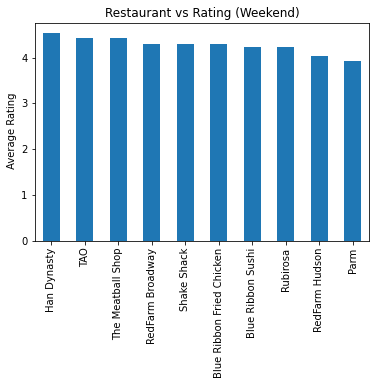

In [42]:
top_10_df_end.plot(kind = "bar", y = ("rating", "mean"), legend = None)
plt.xlabel('')
plt.ylabel(" Average Rating")
plt.title("Restaurant vs Rating (Weekend)")

In [43]:
repeated_name = []
for name1 in top_10_df_day.index:
  for name2 in top_10_df_end.index:
    if name1 == name2:
      repeated_name.append(name2)
      break
repeated_name

['The Meatball Shop',
 'Parm',
 'Blue Ribbon Fried Chicken',
 'Shake Shack',
 'Blue Ribbon Sushi',
 'RedFarm Broadway']

We are only considering the top 10 restaurants with the highest orders and ratings to make a concise graph and give an accurate restaurant recommendation. There are restaurants with higher ratings outside of these top 10, but they do not have enough orders to make the ratings believable. From the sorted graphs above, we can see the top 3 restaurants with the highest ratings are:
* Weekdays
 * Blue Ribbon Sushi Bar & Grill (4.9)
 * The Meatball Shop (4.7)
 * Parm	(4.5)
* Weekends
 * Han Dynasty (4.5)
 * TAO (4.4)
 * The Meatball Shop (4.4)

The following restaurants remain in the top 10 throughout the whole week:
* The Meatball Shop
* Parm
* Blue Ribbon Fried Chicken
* Shake Shack
* Blue Ribbon Sushi
* RedFarm Broadway

If we were to give any restaurant recommendation based on these results, The Meatball Shop would be the first pick because of its high rating

### Cost of Order vs Rating

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

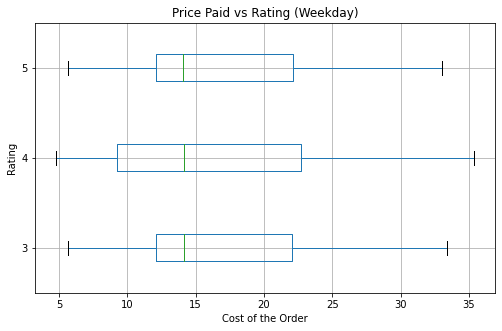

In [44]:
df_weekday.boxplot(by ='rating', column =['cost_of_the_order'], vert = False, figsize = (8,5))
plt.xlabel("Cost of the Order")
plt.ylabel("Rating")
plt.title("Price Paid vs Rating (Weekday)")
plt.suptitle("")

In [45]:
cost_v_rating_df = df_weekday[["rating","cost_of_the_order"]].groupby(by = ["rating"]).agg(['count', 'mean', 'min', 'max', 'std'])
cost_v_rating_df

cost_of_the_order                                  
                   count       mean   min    max       std
rating                                                    
3                     63  16.275397  5.67  33.37  7.973670
4                    109  15.987982  4.75  35.41  7.797097
5                    168  16.306667  5.67  33.03  7.198277

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

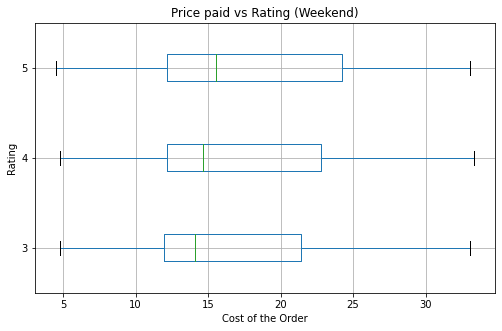

In [46]:
df_weekend.boxplot(by ='rating', column =['cost_of_the_order'], vert = False, figsize = (8,5))
plt.xlabel("Cost of the Order")
plt.ylabel("Rating")
plt.title("Price paid vs Rating (Weekend)")
plt.suptitle("")

In [47]:
cost_v_rating_df = df_weekend[["rating","cost_of_the_order"]].groupby(by = ["rating"]).agg(['count', 'mean', 'min', 'max', 'std'])
cost_v_rating_df

cost_of_the_order                                  
                   count       mean   min    max       std
rating                                                    
3                    125  16.197120  4.75  33.03  7.805336
4                    277  16.994585  4.80  33.37  7.562787
5                    420  17.229310  4.47  33.03  7.538806

During the weekdays, the median cost of the orders was approximately 14 dollars, and the mean price was closer to 16 dollars. Comparing the values to the weekends, we see that the median (15) and average (17) were slightly higher.

During the weekends, we noticed that the average cost of the order was slightly higher as the rating increased. Additionally, rating 5 has about half the orders compared to the other ratings.

For the weekdays, we could not find any noticeable trend when comparing the cost of the order against the rating.

If giving more information regarding the breakdown of the cost of the order, we could find whether the higher cost on the weekends is due to the customer providing a tip to the driver or higher fees during the weekends.

### Completion Time vs Rating

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

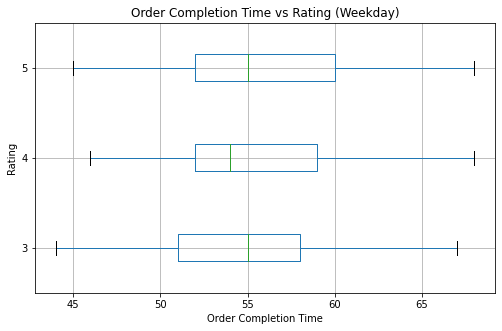

In [48]:
df_weekday.boxplot(by ='rating', column =['order_completion_time'], vert = False, figsize = (8,5))
plt.xlabel("Order Completion Time")
plt.ylabel("Rating")
plt.title("Order Completion Time vs Rating (Weekday)")
plt.suptitle("")

In [49]:
time_v_rating_df = df_weekday[["rating","order_completion_time"]].groupby(by = ["rating"]).agg(['count', 'mean', 'min', 'max', 'std'])
time_v_rating_df

order_completion_time                             
                       count       mean min max       std
rating                                                   
3                         63  54.666667  44  67  5.447699
4                        109  55.422018  46  68  5.218013
5                        168  56.000000  45  68  5.605814

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

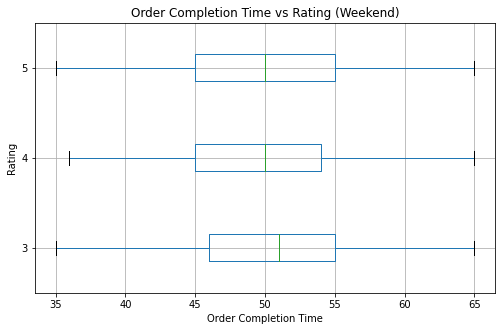

In [50]:
df_weekend.boxplot(by ='rating', column =['order_completion_time'], vert = False, figsize = (8,5))
plt.xlabel("Order Completion Time")
plt.ylabel("Rating")
plt.title("Order Completion Time vs Rating (Weekend)")
plt.suptitle("")

In [51]:
time_v_rating_df = df_weekend[["rating","order_completion_time"]].groupby(by = ["rating"]).agg(['count', 'mean', 'min', 'max', 'std'])
time_v_rating_df

order_completion_time                             
                       count       mean min max       std
rating                                                   
3                        125  50.640000  35  65  6.487457
4                        277  49.628159  36  65  6.490992
5                        420  49.795238  35  65  6.609531

One primary assumption we made is that order_completion_time and rating would be inversely related (i.e., the orders that take longer to complete will have a lower rating). However, that is not the case during the weekday. The average of order_completion_time slightly increases as the rating increases.

The same cannot be said for the orders that occur on the weekends. On average, orders with a rating of 3 have one more minute than those with higher ratings. 

We can infer that customers are willing to wait longer during the weekdays than on the weekends. We could analyze this further if the timestamp for each order was provided. We could compare if an order happens during working hours or after hours and see how that affects the rating. 

### Cuisine Type vs Rating

Text(0.5, 0, '')

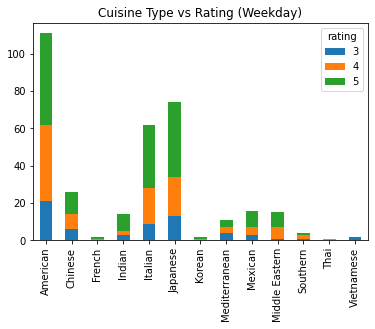

In [52]:
df_weekday.groupby(by = ["cuisine_type", "rating" ]).size().unstack().plot(kind='bar', stacked=True)
plt.title("Cuisine Type vs Rating (Weekday)")
plt.xlabel("")

In [53]:
cuisine_v_rating_day_df = df_weekday[["cuisine_type","rating", "cost_of_the_order", "order_completion_time"]].groupby(by = ["cuisine_type"]).agg({"rating" :[ 'count','mean']})
cuisine_v_rating_day_graph = cuisine_v_rating_day_df.sort_values(by =("rating", "mean"), ascending = False)

Text(0.5, 0, '')

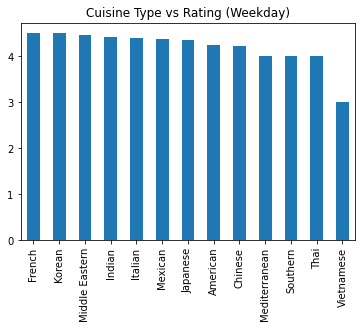

In [54]:
cuisine_v_rating_day_graph.plot(kind = 'bar', y = ("rating", "mean"), legend = None)
plt.title("Cuisine Type vs Rating (Weekday)")
plt.xlabel("")

Text(0.5, 0, '')

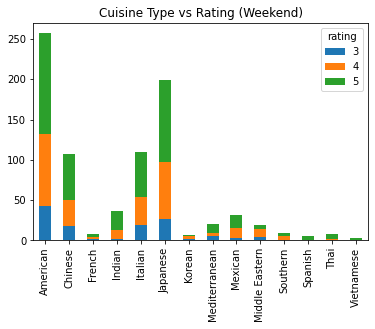

In [55]:
df_weekend.groupby(by = ["cuisine_type", "rating" ]).size().unstack().plot(kind='bar', stacked=True)
plt.title("Cuisine Type vs Rating (Weekend)")
plt.xlabel("")

In [56]:
cuisine_v_rating_end_df = df_weekend[["cuisine_type","rating", "cost_of_the_order", "order_completion_time"]].groupby(by = ["cuisine_type"]).agg({"rating":['count','mean']})
cuisine_v_rating_end_graph= cuisine_v_rating_end_df.sort_values(by =("rating", "mean"), ascending = False)

Text(0.5, 0, '')

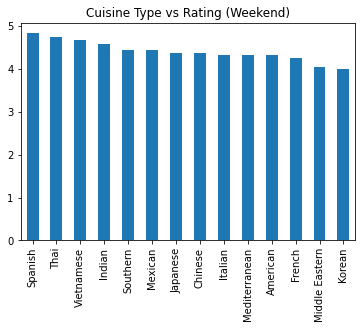

In [57]:
cuisine_v_rating_end_graph.plot(kind = 'bar', y = ("rating", "mean"), legend = None)
plt.title("Cuisine Type vs Rating (Weekend)")
plt.xlabel("")

From the graphs above, we can observe that:
*  American, Japanese, Italian, and Chinese are the best-performing cuisines in terms of orders overall
* Spanish, Thai, and Indian are the top 3 highly-rated cuisines on the weekends
* French, Korean, and Middle Eastern are the top 3 highly rated cuisines on the weekdays
* We would recommend adding more restaurants in the top 3 highly rated cuisines to potentially attract more customers to the food delivery application
* Based on this dataset, we recommend ordering from restaurants that fall into Spanish or French cuisines.

## Limitations

* data does not provide a timestamp specifying the date and time for each order. A  more detailed and thorough analysis can be conducted if a timestamp were to be provided
* The data needs to provide a breakdown of the order's cost, allowing us to understand the underlying reason behind the prices for each order
* Approximately 40% of the original data had to be dropped because it did not contain ratings 